# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [71]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)

Number of cities in the list: 450


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [59]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"

    # Log the url, record, and set numbers
    # print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(f"Processing Record {record_count} of Set {set_count} | City: {city} | URL: {city_url}")
    # Add 1 to the record count
    record_count += 1
    
   

       # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | City: salinas | URL: http://api.openweathermap.org/data/2.5/weather?q=salinas&appid=72bb4e5c7c458229dca866e958f523e5&units=metric
Processing Record 2 of Set 1 | City: bu'aale | URL: http://api.openweathermap.org/data/2.5/weather?q=bu'aale&appid=72bb4e5c7c458229dca866e958f523e5&units=metric
Processing Record 3 of Set 1 | City: laholm | URL: http://api.openweathermap.org/data/2.5/weather?q=laholm&appid=72bb4e5c7c458229dca866e958f523e5&units=metric
Processing Record 4 of Set 1 | City: mount pearl | URL: http://api.openweathermap.org/data/2.5/weather?q=mount pearl&appid=72bb4e5c7c458229dca866e958f523e5&units=metric
Processing Record 5 of Set 1 | City: nova sintra | URL: http://api.openweathermap.org/data/2.5/weather?q=nova sintra&appid=72bb4e5c7c458229dca866e958f523e5&units=metric
Processing Record 6 of Set 1 | City: port-aux-francais | URL: http://api.openweathermap.org/data/2.5/weather?q=port-aux-f

In [72]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          415
Lat           415
Lng           415
Max Temp      415
Humidity      415
Cloudiness    415
Wind Speed    415
Country       415
Date          415
dtype: int64

In [73]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salinas,36.6777,-121.6555,32.13,49,0,0.45,US,1728244281
1,bu'aale,1.0833,42.5833,24.54,82,95,5.03,SO,1728244282
2,laholm,56.5121,13.0437,8.08,87,38,2.15,SE,1728244283
3,mount pearl,47.5166,-52.7813,10.08,87,100,6.17,CA,1728244284
4,nova sintra,14.8667,-24.7167,28.09,75,70,1.89,CV,1728244286


In [74]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [75]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salinas,36.6777,-121.6555,32.13,49,0,0.45,US,1728244281
1,bu'aale,1.0833,42.5833,24.54,82,95,5.03,SO,1728244282
2,laholm,56.5121,13.0437,8.08,87,38,2.15,SE,1728244283
3,mount pearl,47.5166,-52.7813,10.08,87,100,6.17,CA,1728244284
4,nova sintra,14.8667,-24.7167,28.09,75,70,1.89,CV,1728244286


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

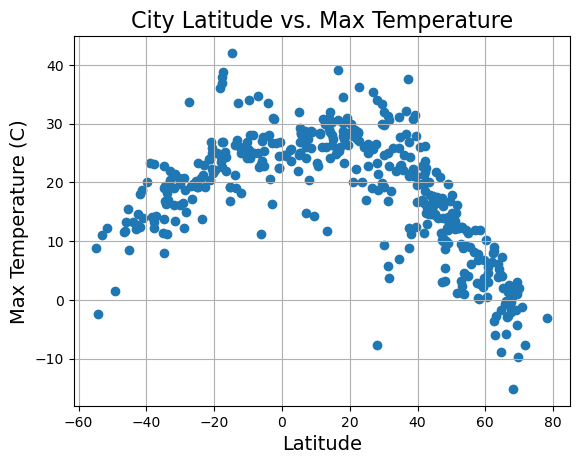

In [76]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

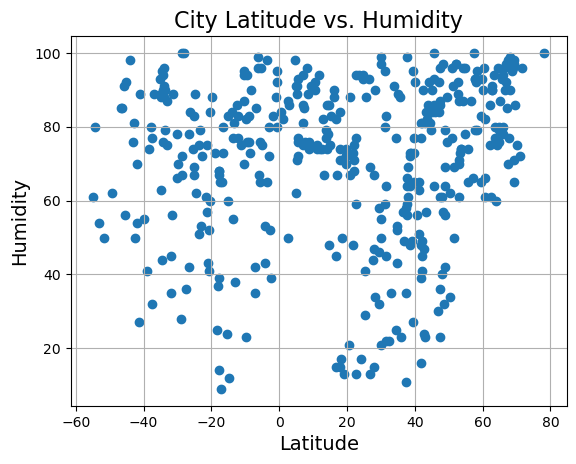

In [81]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

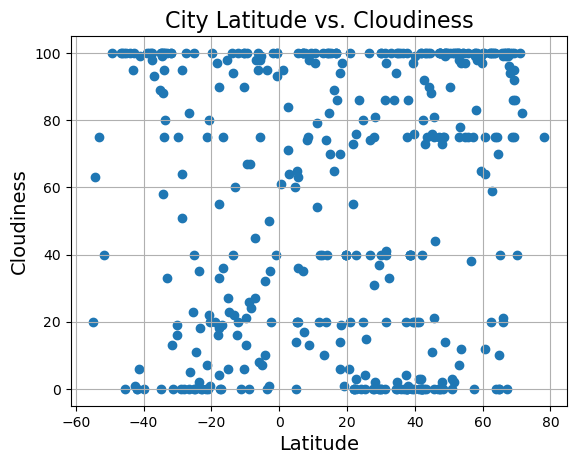

In [80]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

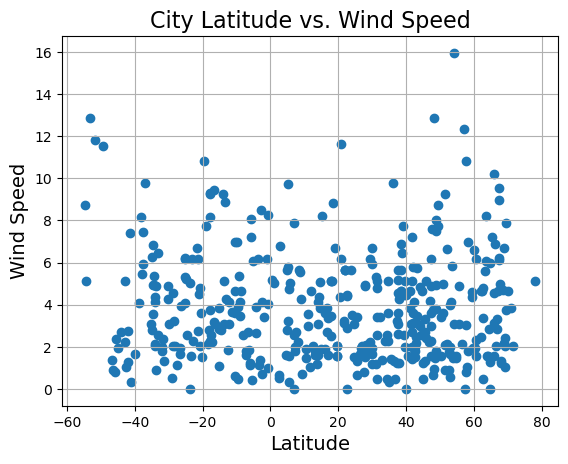

In [82]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


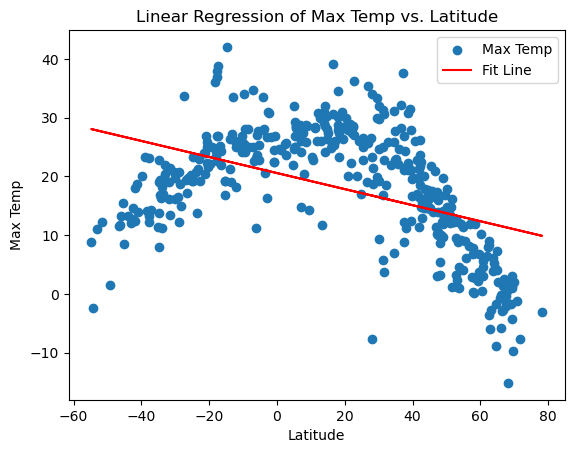

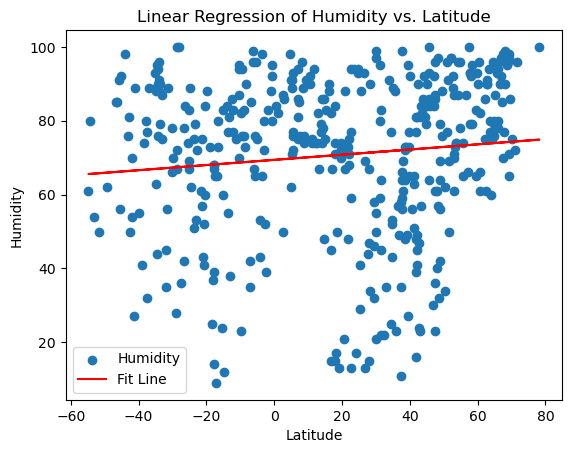

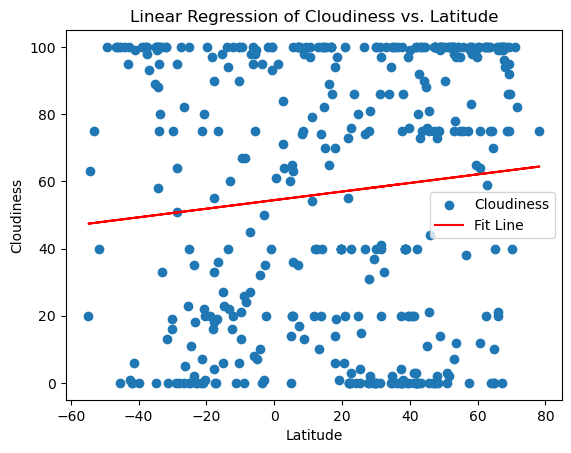

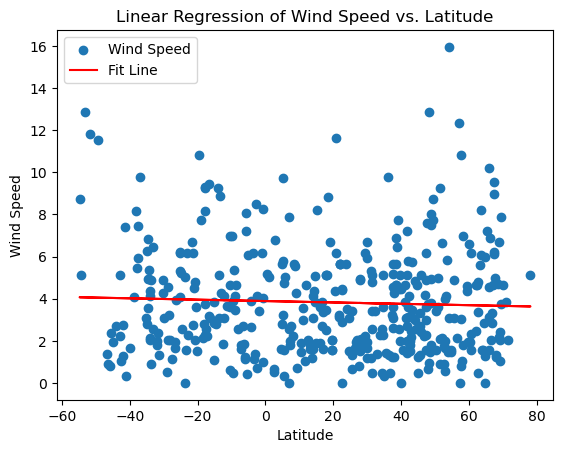

In [101]:
# Define a function to create Linear Regression plots
def create_linregression_plot(y_column):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(city_data_df["Lat"], city_data_df[y_column])

    # Create a scatter plot
    plt.scatter(city_data_df["Lat"], city_data_df[y_column], label=y_column)
    
    # Create a line of best fit
    plt.plot(city_data_df["Lat"], intercept + slope * city_data_df["Lat"], color='red', label='Fit Line')

    # Add labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_column)
    plt.title(f"Linear Regression of {y_column} vs. Latitude")
    plt.legend()
    
    # Show the plot
    plt.show()

# Define the list of columns you want to plot
plots = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Loop through each column in the plots list and create a regression plot
for column in plots:
    create_linregression_plot(column)

In [105]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salinas,36.6777,-121.6555,32.13,49,0,0.45,US,1728244281
1,bu'aale,1.0833,42.5833,24.54,82,95,5.03,SO,1728244282
2,laholm,56.5121,13.0437,8.08,87,38,2.15,SE,1728244283
3,mount pearl,47.5166,-52.7813,10.08,87,100,6.17,CA,1728244284
4,nova sintra,14.8667,-24.7167,28.09,75,70,1.89,CV,1728244286


In [106]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port-aux-francais,-49.3500,70.2167,1.45,62,100,11.54,TF,1728244287
6,ushuaia,-54.8000,-68.3000,8.81,61,20,8.75,AR,1728244288
7,sao jose da coroa grande,-8.8978,-35.1478,24.96,76,26,3.47,BR,1728244290
9,callao,-12.0667,-77.1500,18.16,77,100,3.09,PE,1728244292
10,margaret river,-33.9500,115.0667,11.20,91,95,2.03,AU,1728244293


###  Temperature vs. Latitude Linear Regression Plot

slope = -0.4708956392052902, y-intercept = 34.79132499800126, r = -0.8195460637976961


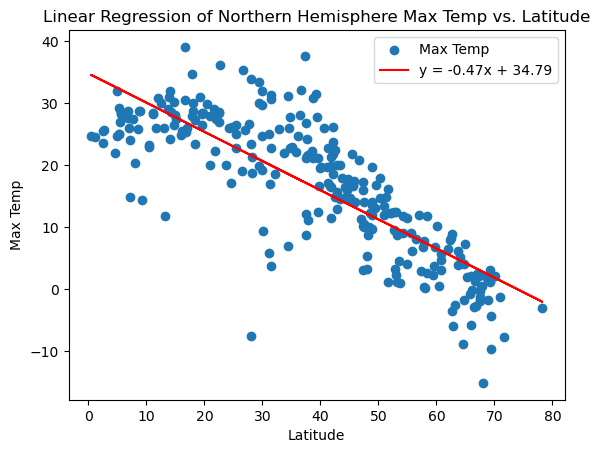

slope = 0.21225266318510871, y-intercept = 63.151702774661985, r = 0.18477016933300186


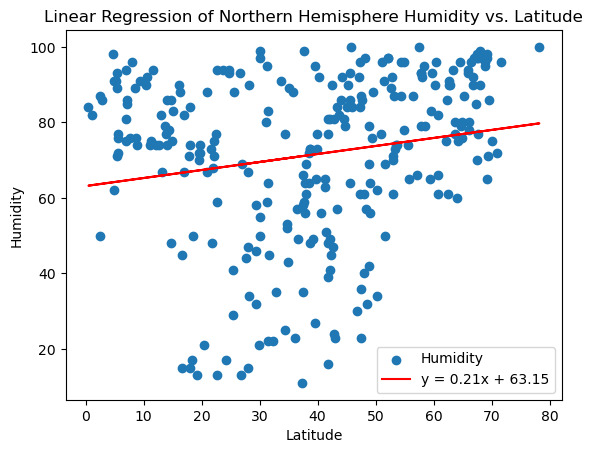

slope = 0.3737455080097309, y-intercept = 44.25840559296907, r = 0.1815665011745356


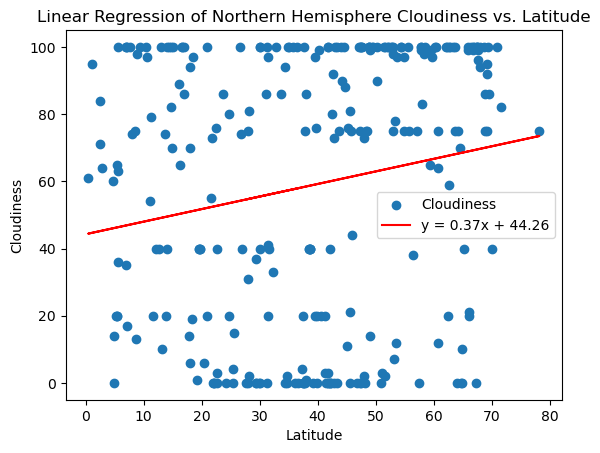

slope = 0.012953304053418026, y-intercept = 3.1856719083111353, r = 0.10033568888989587


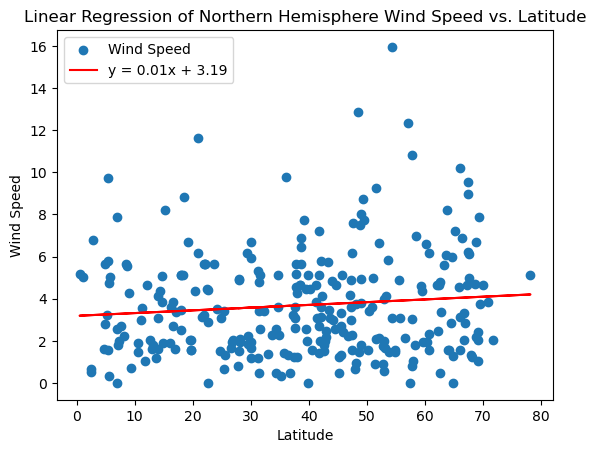

In [143]:
# Linear regression on Northern Hemisphere
def create_linregression_plot(y_column):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df[y_column])

    # Create a scatter plot
    plt.scatter(northern_hemi_df["Lat"], northern_hemi_df[y_column], label=y_column)
    
    # Create a line of best fit
    plt.plot(northern_hemi_df["Lat"], intercept + slope * northern_hemi_df["Lat"], color='red', label= f"y = {slope:.2f}x + {intercept:.2f}")

    # Add labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_column)
    plt.title(f"Linear Regression of Northern Hemisphere {y_column} vs. Latitude")
    # plt.text(0.5, 0.1,f"y = {slope:.2f}x + {intercept:.2f}", color='red', fontsize=16, va="bottom" )
    plt.legend()
    
    # Show the plot
    print(f"slope = {slope}, y-intercept = {intercept}, r = {r_value}")
    plt.show()

# Define the list of columns you want to plot
plots = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Loop through each column in the plots list and create a regression plot
for column in plots:
    create_linregression_plot(column)

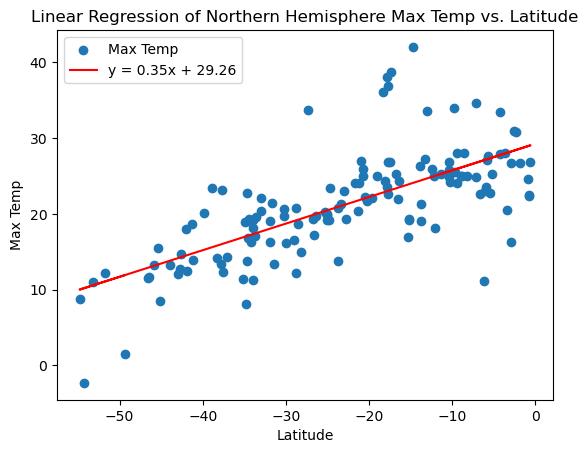

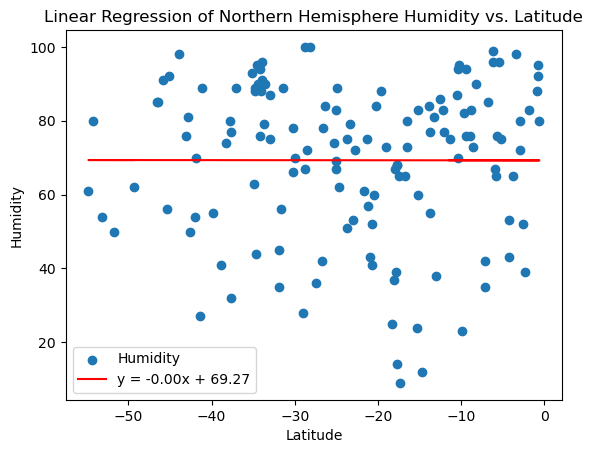

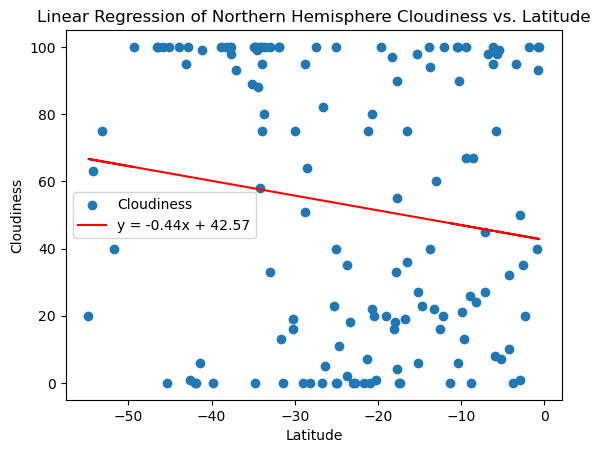

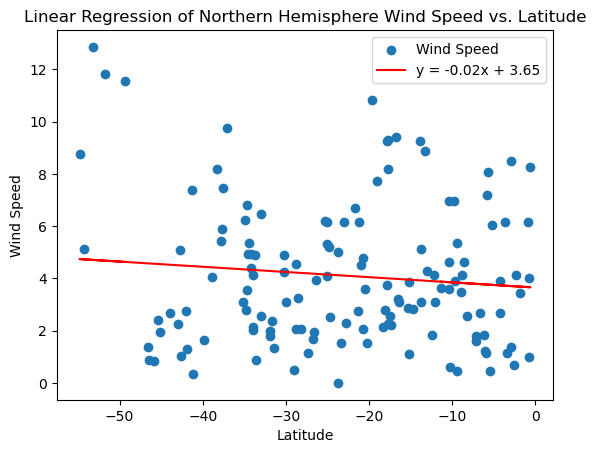

In [140]:
# Linear regression on Southern Hemisphere
def create_linregression_plot(y_column):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df[y_column])

    # Create a scatter plot
    plt.scatter(southern_hemi_df["Lat"], southern_hemi_df[y_column], label=y_column)
    
    # Create a line of best fit
    plt.plot(southern_hemi_df["Lat"], intercept + slope * southern_hemi_df["Lat"], color='red', label= f"y = {slope:.2f}x + {intercept:.2f}")

    # Add labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_column)
    plt.title(f"Linear Regression of Northern Hemisphere {y_column} vs. Latitude")
    # plt.text(0.5, 0.1,f"y = {slope:.2f}x + {intercept:.2f}", color='red', fontsize=16, va="bottom" )
    plt.legend()
    
    # Show the plot
    plt.show()
    
    # Define the list of columns you want to plot
plots = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Loop through each column in the plots list and create a regression plot
for column in plots:
    create_linregression_plot(column)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


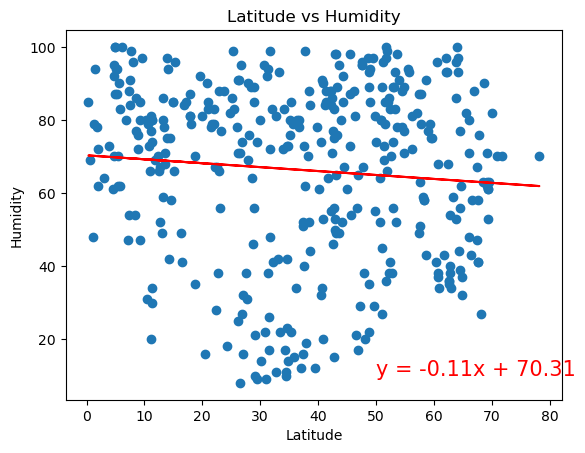

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


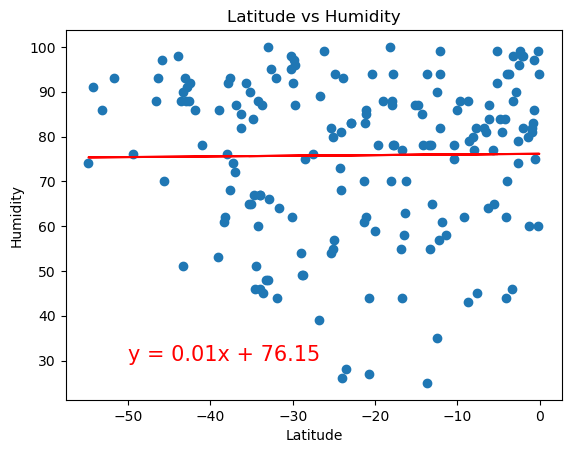

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


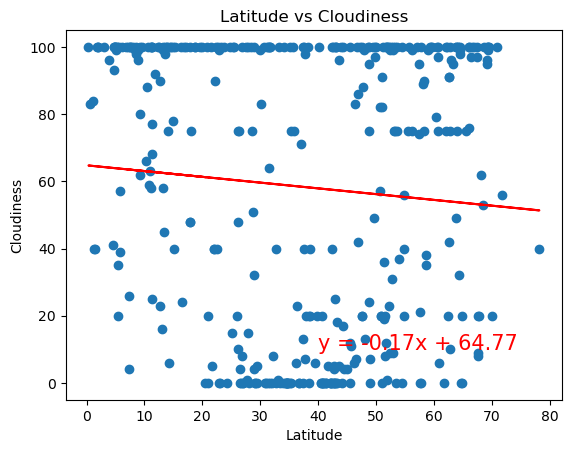

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


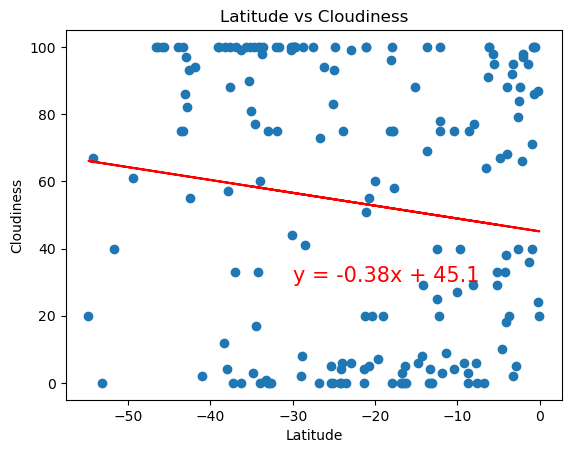

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


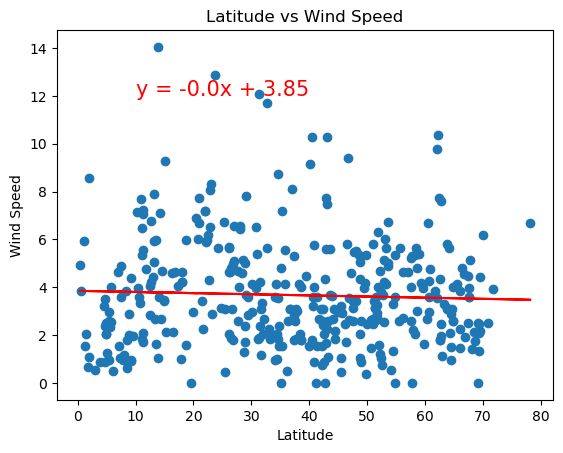

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


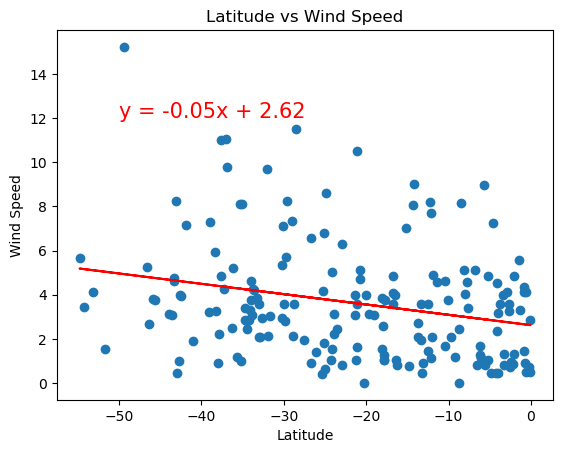

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE